In [1]:
import pandas as pd 
import numpy as np
import os
import warnings
import matplotlib.pyplot as plt

%matplotlib inline


plt.rcParams["font.size"]=24

import seaborn as sns

sns.set(font_scale=2)

from IPython.core.pylabtools import figsize

warnings.filterwarnings("ignore")


root_id = "."
project_id = "breast_cancer"
image_path = os.path.join(root_id,"images",project_id)

def save_fig(fig_id,tight_layout=True, ext="png", dim=300):
    os.makedirs(image_path, exist_ok=True)
    fig_path = os.path.join(image_path,fig_id+"."+ext)
    print("saving...."+fig_id)
    if tight_layout:
        plt.tight_layout()
    savefig(fig_id,format=ext, dpi=dim)

In [2]:
data = pd.read_csv("breast-cancer.data", names=["class","age","menopause","tumor_size","inv_nodes", "node_caps", 
                                                "deg_malig", "breast","breast_quad", "irradiat"])
data.head()

,class,age,menopause,tumor_size,inv_nodes,node_caps,deg_malig,breast,breast_quad,irradiat
0,no-recurrence-events,30-39,premeno,30-34,0-2,no,3,left,left_low,no
1,no-recurrence-events,40-49,premeno,20-24,0-2,no,2,right,right_up,no
2,no-recurrence-events,40-49,premeno,20-24,0-2,no,2,left,left_low,no
3,no-recurrence-events,60-69,ge40,15-19,0-2,no,2,right,left_up,no
4,no-recurrence-events,40-49,premeno,0-4,0-2,no,2,right,right_low,no


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 286 entries, 0 to 285
Data columns (total 10 columns):
class          286 non-null object
age            286 non-null object
menopause      286 non-null object
tumor_size     286 non-null object
inv_nodes      286 non-null object
node_caps      286 non-null object
deg_malig      286 non-null int64
breast         286 non-null object
breast_quad    286 non-null object
irradiat       286 non-null object
dtypes: int64(1), object(9)
memory usage: 22.5+ KB


In [4]:
data.describe()

,deg_malig
count,286.000000
mean,2.048951
std,0.738217
min,1.000000
25%,2.000000
50%,2.000000
75%,3.000000
max,3.000000


In [5]:
data["age"].value_counts()

50-59    96
40-49    90
60-69    57
30-39    36
70-79     6
20-29     1
Name: age, dtype: int64

In [6]:
data["menopause"].value_counts()

premeno    150
ge40       129
lt40         7
Name: menopause, dtype: int64

In [7]:
data["inv_nodes"].value_counts()

0-2      213
3-5       36
6-8       17
9-11      10
15-17      6
12-14      3
24-26      1
Name: inv_nodes, dtype: int64

In [8]:
data["node_caps"].value_counts()

no     222
yes     56
?        8
Name: node_caps, dtype: int64

In [9]:
data["breast"].value_counts()

left     152
right    134
Name: breast, dtype: int64

In [10]:
data["age"] = data["age"].replace({"50-59": "50s",
                                   "40-49":"40s",
                                   "60-69":"60s",
                                   "30-39":"30s",
                                   "70-79":"70s",
                                   "20-29":"20s"})

In [11]:
data["inv_nodes"] = data["inv_nodes"].replace({"0-2":1,
                                              "3-5":4,
                                              "6-8":7,
                                              "9-11":10,
                                              "15-17":16,
                                              "12-14":13,
                                              "24-26":25})

In [12]:
data["node_caps"] = data["node_caps"].replace({"?":"no"})

In [13]:
data["tumor_size"].value_counts()

30-34    60
25-29    54
20-24    50
15-19    30
10-14    28
40-44    22
35-39    19
0-4       8
50-54     8
5-9       4
45-49     3
Name: tumor_size, dtype: int64

In [14]:
data["tumor_size"] = data["tumor_size"].replace({"30-34":32,
                                                "25-29":27,
                                                "20-24":22,
                                                "15-19":17,
                                                "10-14":12,
                                                "40-44":42,
                                                "35-39":37,
                                                "0-4":2,
                                                "50-54":52,
                                                 "5-9": 7,
                                                "45-49":47})

In [15]:
num_columns = ["tumor_size","inv_nodes"]
for col in num_columns:
    data[col] = data[col].astype(float)

In [16]:
data.head()

,class,age,menopause,tumor_size,inv_nodes,node_caps,deg_malig,breast,breast_quad,irradiat
0,no-recurrence-events,30s,premeno,32.0,1.0,no,3,left,left_low,no
1,no-recurrence-events,40s,premeno,22.0,1.0,no,2,right,right_up,no
2,no-recurrence-events,40s,premeno,22.0,1.0,no,2,left,left_low,no
3,no-recurrence-events,60s,ge40,17.0,1.0,no,2,right,left_up,no
4,no-recurrence-events,40s,premeno,2.0,1.0,no,2,right,right_low,no


In [17]:
# data = new_data(data)
data["breast"].value_counts()

left     152
right    134
Name: breast, dtype: int64

In [18]:
data["breast_quad"].value_counts()

left_low     110
left_up       97
right_up      33
right_low     24
central       21
?              1
Name: breast_quad, dtype: int64

In [19]:
data[data["breast_quad"]=="?"]

,class,age,menopause,tumor_size,inv_nodes,node_caps,deg_malig,breast,breast_quad,irradiat
206,recurrence-events,50s,ge40,32.0,1.0,no,3,left,?,no


In [20]:
data["breast_quad"] = data["breast_quad"].replace({"?":"left_low"})

In [21]:
data[data["breast_quad"]=="?"]

,class,age,menopause,tumor_size,inv_nodes,node_caps,deg_malig,breast,breast_quad,irradiat


In [22]:
data.iloc[:,9].value_counts()

no     218
yes     68
Name: irradiat, dtype: int64

In [23]:
def new_data(df):
    numeric = df.select_dtypes("number")
    for  col in list(numeric.columns):
        if col == "deg_malig":
            next
        else:
            numeric["sqr_"+col] = np.sqrt(numeric[col])
            numeric["log_"+col] = np.log(numeric[col])
            
    categoricals = df.select_dtypes("object")
    dummies = pd.get_dummies(categoricals)
    
    df = pd.concat([numeric,dummies], axis=1)
    return df

In [24]:
data = new_data(data)

In [25]:
data.head()

,tumor_size,inv_nodes,deg_malig,sqr_tumor_size,log_tumor_size,sqr_inv_nodes,log_inv_nodes,class_no-recurrence-events,class_recurrence-events,age_20s,...,node_caps_yes,breast_left,breast_right,breast_quad_central,breast_quad_left_low,breast_quad_left_up,breast_quad_right_low,breast_quad_right_up,irradiat_no,irradiat_yes
0,32.0,1.0,3,5.656854,3.465736,1.0,0.0,1,0,0,...,0,1,0,0,1,0,0,0,1,0
1,22.0,1.0,2,4.690416,3.091042,1.0,0.0,1,0,0,...,0,0,1,0,0,0,0,1,1,0
2,22.0,1.0,2,4.690416,3.091042,1.0,0.0,1,0,0,...,0,1,0,0,1,0,0,0,1,0
3,17.0,1.0,2,4.123106,2.833213,1.0,0.0,1,0,0,...,0,0,1,0,0,1,0,0,1,0
4,2.0,1.0,2,1.414214,0.693147,1.0,0.0,1,0,0,...,0,0,1,0,0,0,1,0,1,0


In [26]:
correlations = data.corr()

In [27]:
correlations["deg_malig"].sort_values(ascending=False)

deg_malig                     1.000000
log_inv_nodes                 0.344442
sqr_inv_nodes                 0.343710
inv_nodes                     0.329048
node_caps_yes                 0.325930
class_recurrence-events       0.299400
sqr_tumor_size                0.229005
tumor_size                    0.218169
log_tumor_size                0.217597
irradiat_yes                  0.208099
menopause_ge40                0.054211
breast_left                   0.052861
breast_quad_left_up           0.052634
age_30s                       0.046313
age_50s                       0.023117
breast_quad_right_up          0.020563
age_40s                       0.016290
age_20s                      -0.003935
breast_quad_left_low         -0.004221
menopause_premeno            -0.031758
breast_quad_right_low        -0.037217
age_60s                      -0.045018
breast_right                 -0.052861
menopause_lt40               -0.071934
breast_quad_central          -0.073271
age_70s                  

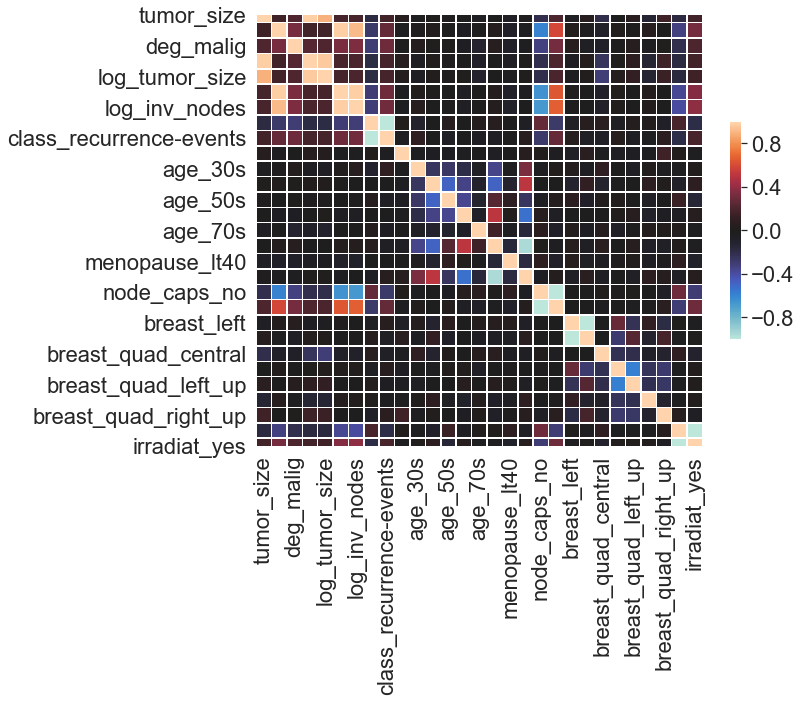

In [28]:
figsize(10,8)

sns.heatmap(correlations, center=0,square =True, linewidths=.5, cbar_kws={"shrink": .5})
plt.show()

In [29]:
def drop_coli(x, threshold):
    
    y = x["deg_malig"]
    x = x.drop("deg_malig", axis=1)
    corr_ = x.corr()
    cols_ = list(corr_.columns)
    drop_cols =[]
    for i in range(len(cols_)-1):
        for j in range(i):
            item = corr_.iloc[j:(j+1),(i+1):(i+2)]
            col = item.columns
            row = item.index
            val = abs(item.values)
            if val >= threshold:
                drop_cols.append(col.values[0])
                
    
    drops = set(drop_cols)
    x = x.drop(columns=drops)
    x ["deg_malig"] = y
    
    return x
    

In [30]:
data=drop_coli(data, 0.5)

In [31]:
data.head()

,tumor_size,inv_nodes,class_no-recurrence-events,class_recurrence-events,age_20s,age_30s,age_40s,age_50s,age_60s,age_70s,...,breast_left,breast_right,breast_quad_central,breast_quad_left_low,breast_quad_left_up,breast_quad_right_low,breast_quad_right_up,irradiat_no,irradiat_yes,deg_malig
0,32.0,1.0,1,0,0,1,0,0,0,0,...,1,0,0,1,0,0,0,1,0,3
1,22.0,1.0,1,0,0,0,1,0,0,0,...,0,1,0,0,0,0,1,1,0,2
2,22.0,1.0,1,0,0,0,1,0,0,0,...,1,0,0,1,0,0,0,1,0,2
3,17.0,1.0,1,0,0,0,0,0,1,0,...,0,1,0,0,1,0,0,1,0,2
4,2.0,1.0,1,0,0,0,1,0,0,0,...,0,1,0,0,0,1,0,1,0,2


In [32]:
features = data.drop("deg_malig", axis=1)
targets = data["deg_malig"].copy()

In [33]:
from sklearn.model_selection import train_test_split

X, X_test, y, y_test = train_test_split(features, targets, test_size=0.3,random_state=42)

print(X.shape)
print(X_test.shape)
print(y.shape)
print(y_test.shape)

(200, 20)
(86, 20)
(200,)
(86,)


In [34]:
def mae(y_true,y_pred):
    return np.mean(abs(y_true-y_pred))

In [35]:
baseline = np.median(y)

In [36]:
print("The baseline for this model is : %.4f" %baseline)
print("The baseline mean absolute error for this model is : %.4f" %mae(y_test,baseline))

The baseline for this model is : 2.0000
The baseline mean absolute error for this model is : 0.5349


In [37]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import Imputer


In [38]:
imputer = Imputer(strategy="median")
imputer.fit(X,y)
imputer.transform (X)
imputer.transform (X_test)

C:\Users\Kathie\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:66: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)


array([[22.,  1.,  1., ...,  0.,  1.,  0.],
       [22., 25.,  0., ...,  0.,  0.,  1.],
       [47.,  1.,  1., ...,  0.,  0.,  1.],
       ...,
       [22.,  1.,  1., ...,  0.,  1.,  0.],
       [17.,  1.,  0., ...,  0.,  1.,  0.],
       [27.,  1.,  1., ...,  0.,  1.,  0.]])

In [41]:
print(np.sum(np.isnan(X)))

tumor_size                    0
inv_nodes                     0
class_no-recurrence-events    0
class_recurrence-events       0
age_20s                       0
age_30s                       0
age_40s                       0
age_50s                       0
age_60s                       0
age_70s                       0
menopause_lt40                0
breast_left                   0
breast_right                  0
breast_quad_central           0
breast_quad_left_low          0
breast_quad_left_up           0
breast_quad_right_low         0
breast_quad_right_up          0
irradiat_no                   0
irradiat_yes                  0
dtype: int64


In [42]:
print(np.sum(np.isnan(X_test)))

tumor_size                    0
inv_nodes                     0
class_no-recurrence-events    0
class_recurrence-events       0
age_20s                       0
age_30s                       0
age_40s                       0
age_50s                       0
age_60s                       0
age_70s                       0
menopause_lt40                0
breast_left                   0
breast_right                  0
breast_quad_central           0
breast_quad_left_low          0
breast_quad_left_up           0
breast_quad_right_low         0
breast_quad_right_up          0
irradiat_no                   0
irradiat_yes                  0
dtype: int64


In [43]:
scaler = MinMaxScaler(feature_range=(0,1))
scaler.fit(X,y)
scaler.transform (X)
scaler.transform (X_test)

array([[0.4, 0. , 1. , ..., 0. , 1. , 0. ],
       [0.4, 1.6, 0. , ..., 0. , 0. , 1. ],
       [0.9, 0. , 1. , ..., 0. , 0. , 1. ],
       ...,
       [0.4, 0. , 1. , ..., 0. , 1. , 0. ],
       [0.3, 0. , 0. , ..., 0. , 1. , 0. ],
       [0.5, 0. , 1. , ..., 0. , 1. , 0. ]])

In [45]:
print(np.where(~np.isfinite(X)))
print(np.where(~np.isfinite(X_test)))

(array([], dtype=int64), array([], dtype=int64))
(array([], dtype=int64), array([], dtype=int64))


In [46]:
def test_model(model):
    model.fit(X,y)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    return accuracy

In [48]:
lr = LogisticRegression()
lr_acc = test_model(lr)
print("logistic regression accuracy is : %.4f" %lr_acc)

linear regression accuracy is : 0.4535


In [49]:
knn = KNeighborsClassifier(n_neighbors=5)
knn_acc =test_model(knn)
print("knn accuracy is : %.4f" %knn_acc)

knn accuracy is : 0.4651


In [50]:
tree = DecisionTreeClassifier()
tree_acc = test_model(tree)
print("Decision tree accuracy is : %.4f" %tree_acc)

Decision tree accuracy is : 0.3953


In [51]:
rf = RandomForestClassifier(random_state=42)
rf_acc = test_model(tree)
print("Random forest accuracy is : %.4f" %rf_acc)

Random forest accuracy is : 0.3837


In [52]:
gb = GradientBoostingClassifier(random_state=42)
gb_acc= test_model(gb)
print("Random forest accuracy is : %.4f" %gb_acc)

Random forest accuracy is : 0.4419
